In [1]:
import import_ipynb
import Helper as lib
import operator
import numpy as np

importing Jupyter notebook from Helper.ipynb


In [2]:
# First get the description data
desc_data = lib.GetDescriptionData()

In [3]:
# Then collect tag data
tag_data = lib.GetTagData()

In [4]:
# Collect all features
train_feature_data = np.array(lib.GetFeaturesFileData('data/features_train/features_resnet1000_train.csv'))
test_feature_data = np.array(lib.GetFeaturesFileData('data/features_test/features_resnet1000_test.csv'))
print(len(train_feature_data))

10000


In [5]:
print(train_feature_data[0][1:1001])

['-0.8994496464729309' '-0.9304700493812561' '-2.5033650398254395'
 '-3.1724987030029297' '-2.8191332817077637' '0.9921585917472839'
 '-3.6988630294799805' '0.6199913620948792' '0.9561479091644287'
 '-0.2186994105577469' '0.5958172082901001' '-3.1229825019836426'
 '-2.5487494468688965' '-2.3847455978393555' '-3.594316005706787'
 '-2.3238251209259033' '-0.7482914924621582' '-3.211718797683716'
 '-3.0199339389801025' '-2.9046552181243896' '-0.4094196557998657'
 '-1.793142557144165' '-2.764791250228882' '-2.1501145362854004'
 '-2.2583303451538086' '-1.528522253036499' '0.3937942385673523'
 '-0.9722171425819397' '-1.7514387369155884' '-0.9441556334495544'
 '-1.5331079959869385' '-2.1861319541931152' '-0.7379881143569946'
 '-2.087157726287842' '-2.9884073734283447' '0.5163060426712036'
 '1.0606229305267334' '-0.4704169034957886' '0.8655609488487244'
 '-0.7380955219268799' '-1.872955560684204' '0.899095356464386'
 '-2.969977378845215' '-0.26610067486763' '0.16756798326969147'
 '-1.0325826406

In [6]:
# Remove the extra image file name on the front
feature_data = []
for i in range(len(desc_data[0])):
    new_vector = train_feature_data[i][1:1001]
    new_vector = [float(i) for i in new_vector]
    feature_data.append(new_vector)
feature_data = np.array(feature_data)

In [7]:
print(feature_data.shape)

(10000, 1000)


In [8]:
# Convert tags into a list of individual labels
tag_label_data = []
full_feature_data = []
for i in range(len(tag_data[0])):
    for word in tag_data[0][i]:
        tag_label_data.append(word[1])
        full_feature_data.append(feature_data[i])

tag_label_data = np.array(tag_label_data)
full_feature_data = np.array(full_feature_data)
print(len(full_feature_data))
print(len(tag_data[0]))
print(len(tag_label_data))
print(tag_label_data[0])

28531
10000
28531
airplane


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1000, random_state=0).fit(full_feature_data)

In [16]:
# Helper function that retrieves the most popular tags given a cluster values
# Input feature data should have labels
from scipy.spatial.distance import euclidean
def ClosestTwentyImages(cluster = [], data = []):
    computed_distances = []
    for i in range(len(data)):
        a = np.array(data[i][1:1001], dtype=float)
        b = np.array(cluster, dtype=float)
        distance = np.linalg.norm(a - b)
        computed_distances.append([i, distance])
    # Sort by first index
    computed_distances.sort(key=lambda x: x[1])
    computed_distances = computed_distances[:20]
    ret_list = []
    for entry in computed_distances:
        ret_list.append(entry[0])
    print(ret_list)
    return ret_list
    

Correct image:
Image 0



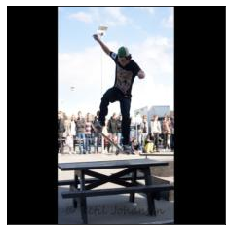

[8236, 0, 9862, 5013, 809, 1396, 4984, 8488, 181, 8491, 6222, 3648, 6705, 4506, 8055, 9831, 7044, 3672, 3136, 7296]
Guess is in closest
Image 8236



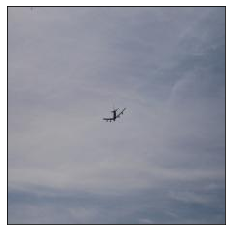

Image 0



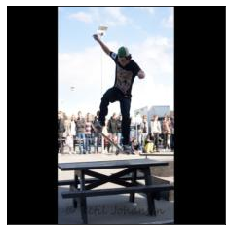

Image 9862



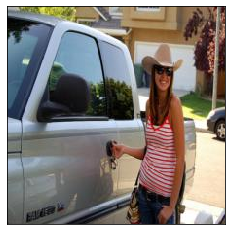

Image 5013



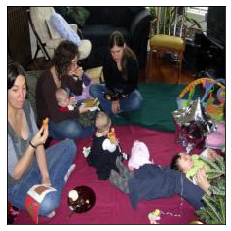

Image 809



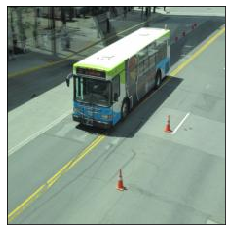

Image 1396



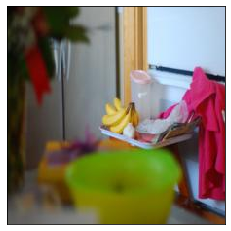

Image 4984



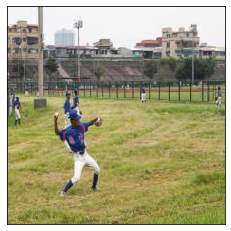

Image 8488



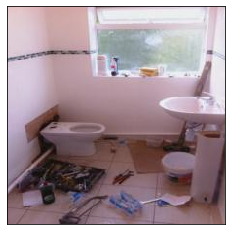

Image 181



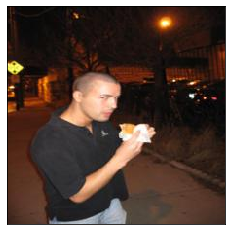

Image 8491



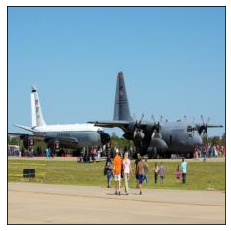

Image 6222



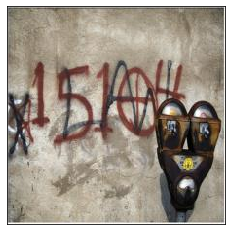

Image 3648



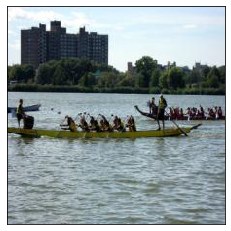

Image 6705



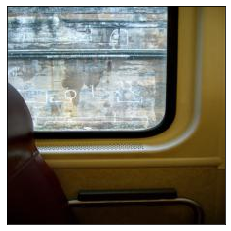

Image 4506



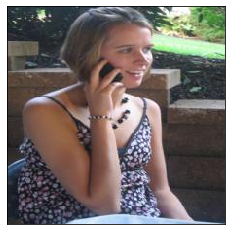

Image 8055



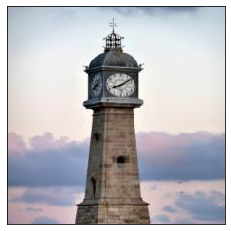

Image 9831



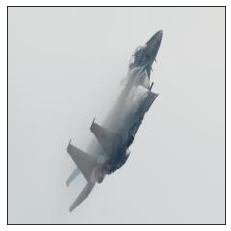

Image 7044



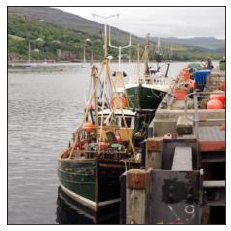

Image 3672



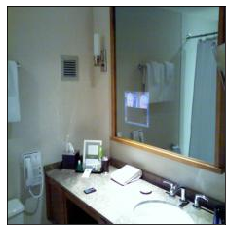

Image 3136



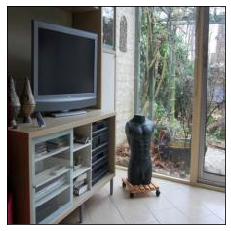

Image 7296



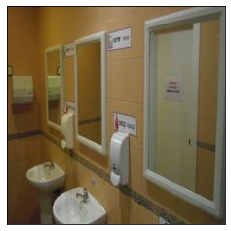

In [17]:
# Try predicting with kmeans model
target_index = 0
target = full_feature_data[target_index].reshape(1,-1)
guess = kmeans.predict(target)
print('Correct image:')
lib.DisplayImage(target_index, 'train')
closest = ClosestTwentyImages(kmeans.cluster_centers_[guess][0], train_feature_data)
if target_index in closest:
    print('Guess is in closest')
else:
    print('Guess is not in closest')
lib.DisplayImages(closest, 'train')